<a href="https://colab.research.google.com/github/shkapril/Data-Science-Projects-2024/blob/main/02_week_mission_Acorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2주차 미션 소개 - EDA를 통한 머신러닝에 영향을 미치는 주요 변수 확인하기

* EDA 를 통해 어떤 피처가 이탈에 영향을 미치는지 확인하고 피처를 변경해서 모델의 성능 개선해 보기
* EDA는 데이터의 구조, 패턴, 이상치, 변수 간 관계 등을 파악하는 데 도움을 줍니다. 모델링 전 데이터에 대한 이해를 가능하게 합니다. 고객 이탈에 영향을 미치는 중요 변수를 식별함으로써, 더 효과적인 피처 선택을 할 수 있습니다. 불필요하거나 적절하지 않은 피처를 제거함으로써, 모델이 특정 데이터에 과적합되는 것을 방지할 수 있습니다. EDA과정은 모델의 복잡성을 줄이고, 성능을 개선하기 위한 피처엔지니어링 전략을 세우는데 중요합니다.

* 미션 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## 미션 1 -  전체 수치 변수를 정답인 이탈 여부로 시각화하고 분석하기
데이터셋의 모든 수치형 변수를 이탈 여부에 따라 시각화하고 수치 구간에 따라 이탈률의 차이에 대해 분석해 주세요.
아래 이미지는 참고용으로 아래 이미지와 똑같이 시각화하지 않아도 됩니다. 이탈 여부를 잘 분석할 수 있는 시각화라면 어떤 시각화든 좋습니다.

<img src="https://i.imgur.com/oCQ9D0l.png">

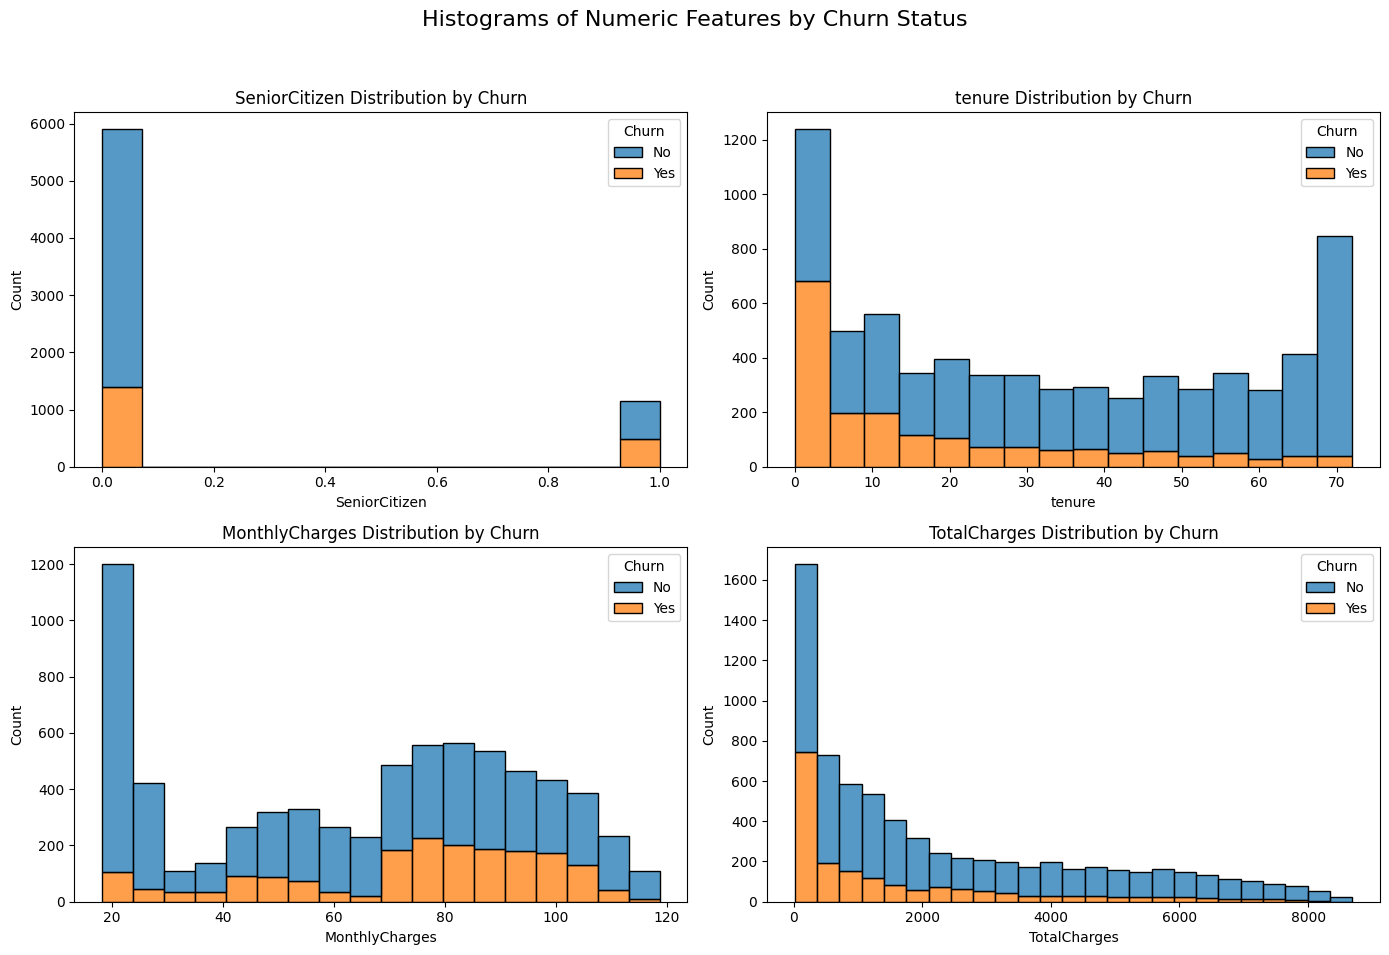

In [14]:
# 위 예시처럼 수치 변수에 대한 히스토그램을 정답값으로 색상을 다르게 하여 히스토그램으로 시각화 해주세요.
# 이탈 여부(Churn)에 따라 수치형 변수들을 히스토그램으로 시각화하는 함수 정의
def plot_histograms(df, feature, ax):
    sns.histplot(data=df, x=feature, hue="Churn", multiple="stack", ax=ax)
    ax.set_title(f'{feature} Distribution by Churn')

# 히스토그램을 위한 준비
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Histograms of Numeric Features by Churn Status', fontsize=16)

# 각 수치형 변수에 대한 히스토그램 생성
plot_histograms(df, 'SeniorCitizen', axes[0, 0])
plot_histograms(df, 'tenure', axes[0, 1])
plot_histograms(df, 'MonthlyCharges', axes[1, 0])
plot_histograms(df, 'TotalCharges', axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


네 개의 히스토그램은 각각 다음과 같은 데이터를 보여줍니다.

Senior Citizen Distribution by Churn: 이탈 고객과 비이탈 고객 중에서 고령자(Senior Citizen)의 비율을 보여줍니다. 대부분의 고객이 고령자가 아닌 것으로 나타나며(0에 해당), 이탈 고객 중 고령자의 비율이 조금 더 높은 것으로 보입니다.

Tenure Distribution by Churn: 고객의 이탈 여부에 따른 재적 기간(tenure)의 분포를 보여줍니다. 재적 기간이 짧을수록 (왼쪽에 가까울수록) 이탈률이 높아 보이며, 재적 기간이 길어질수록 (오른쪽에 가까울수록) 이탈하지 않은 고객의 비율이 높아집니다.

Monthly Charges Distribution by Churn: 월별 요금(Monthly Charges)의 분포와 이탈 여부를 나타냅니다. 월별 요금이 높을수록 이탈 고객의 비율이 상대적으로 높아 보입니다.

Total Charges Distribution by Churn: 총 요금(Total Charges)의 분포를 이탈 여부에 따라 보여줍니다. 총 요금이 낮은 고객들 중에서 이탈한 경우가 많아 보이며, 총 요금이 많이 나온 경우 이탈하지 않은 고객의 비율이 높습니다.

이 데이터를 통해 몇 가지 분석을 할 수 있습니다.

고령자는 전체 고객 대비 소수지만, 이탈률이 약간 더 높을 수 있습니다.
고객의 재적 기간이 길어질수록 이탈할 가능성이 낮아지는 경향이 있습니다.
월별 요금이 높을수록 고객 이탈 가능성이 높아집니다.
총 요금이 낮은 고객들 사이에서 높은 이탈률을 볼 수 있으며, 이는 아마도 서비스 시작 후 초기에 이탈하는 경향이 반영된 것일 수 있습니다.
이러한 분석은 고객 이탈률을 줄이기 위한 전략을 수립하는 데 도움이 될 수 있습니다. 예를 들어, 재적 기간이 짧은 고객들에게 더 많은 인센티브를 제공하거나, 월별 요금이 높은 고객들에게 할인 또는 추가 혜택을 제공하는 등의 전략을 고려할 수 있습니다.

## 미션 2 - 주요 범주형 변수와 정답 값 비교하기

* 범주형 변수가 타겟 변수에 어떤 영향을 미치는지 이해함으로써, 해당 변수의 중요성을 파악할 수 있습니다. 이는 피처 선택 과정에서 중요한 지표가 됩니다. 범주형 변수와 정답 값 간의 관계를 분석함으로써 비즈니스 의사결정, 데이터 전략 수립, 모델 설계에 활용할 수 있습니다. 범주형 변수가 타겟 변수와 강한 관계를 보일 경우, 이는 모델의 예측 성능을 향상시킬 수 있는 중요한 피처임을 알아볼 수 있습니다. 범주형 변수와 정답 값 간의 비교를 통해 예상치 못한 패턴이나 이상치를 발견할 수 있습니다. 이는 데이터 전처리 과정에서 문제점을 해결하고 데이터의 품질을 개선하는 데 도움이 됩니다.
* 주요 범주형 변수와 타겟값인 이탈여부를 분석하는 시각화를 진행하고 그 과정에서 알게된 점을 정리해 주세요.

<img src="https://i.imgur.com/Q1KpQpP.png" width="500">

In [10]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

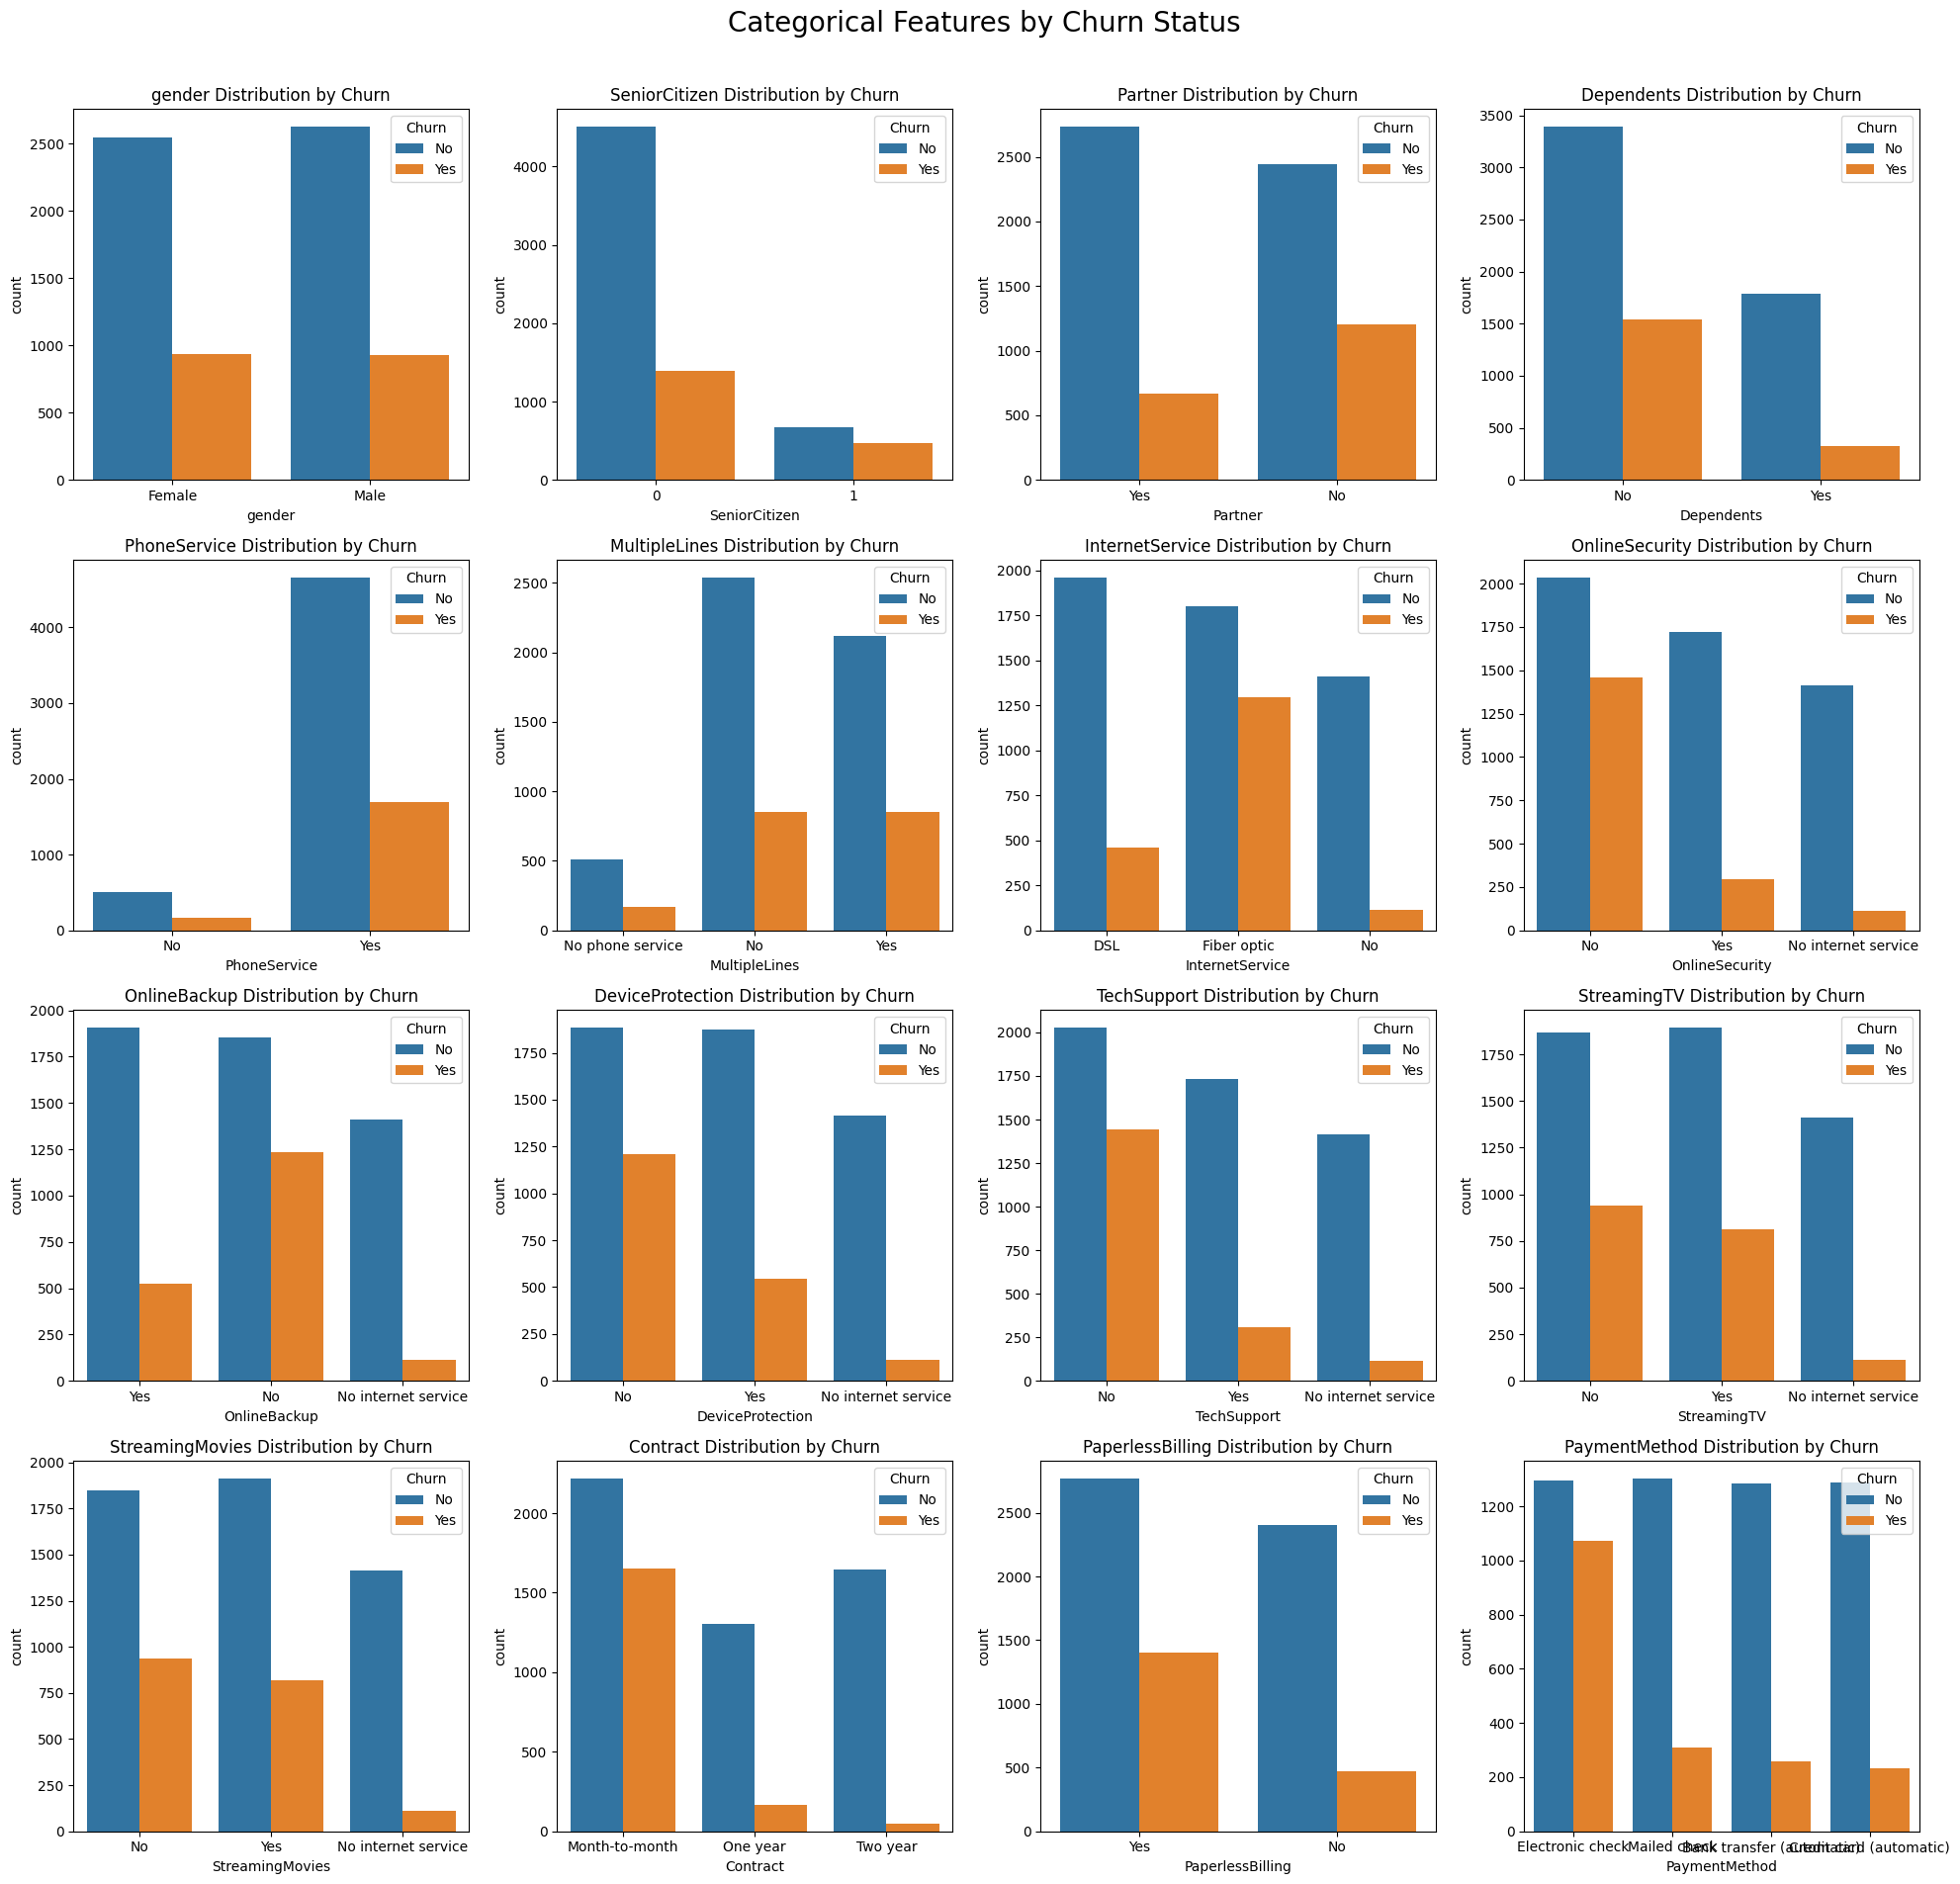

In [18]:
# 다음의 코드를 실행하면 범주형 변수를 볼 수 있습니다.
# 위 예시처럼 시각화를 여기에 구현해 주세요.

# 범주형 변수에 대한 시각화를 위한 함수 정의
def plot_categorical_features(df, feature, ax):
    sns.countplot(x=feature, hue='Churn', data=df, ax=ax)
    ax.set_title(f'{feature} Distribution by Churn')
    ax.legend(title='Churn', loc='upper right')

# 시각화를 위한 준비
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()  # 2D 배열을 1D로 변환
fig.suptitle('Categorical Features by Churn Status', fontsize=20)

category_col_name = category_col.index.tolist()
category_col_name.pop() #마지막 값은 churn이므로 제거.

for i, col in enumerate(category_col_name):
    plot_categorical_features(df, col, axes[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


이탈율에 대한 3가지 의견

1. Contract: 월별 계약 고객의 이탈률이 가장 높습니다. 이는 장기 계약을 장려하는 전략이 효과적일 수 있음을 시사하며, 장기 계약에 대한 인센티브를 제공하여 고객 유지를 개선할 수 있습니다.

2. PaperlessBilling: 종이 없는 청구 서비스를 사용하는 고객들 사이에서 이탈률이 더 높은 것으로 보입니다. 이는 이 서비스의 사용 편의성을 개선하거나, 고객에게 더 명확한 혜택을 제공해야 할 필요가 있음을 나타낼 수 있습니다.

3. PaymentMethod: 전자 체크를 사용하는 고객의 이탈률이 높습니다. 이는 결제 옵션을 다양화하고, 결제 프로세스를 간소화하여 고객 경험을 개선할 필요가 있음을 시사합니다.

## 미션 3 - 수치변수 간의 관계를 파악하기 위해 그래프를 시각화 하고 상관계수를 구해주세요.


상관계수를 통해 변수들 간의 선형적 관계를 파악합니다. 높은 상관관계를 보이는 변수들을 식별하여, 중복되거나 불필요한 특징을 제거함으로써 모델의 성능을 최적화할 수 있습니다. 강한 상관관계를 가진 변수들을 식별하여, 다중공선성 문제를 방지합니다. 상관 행렬을 시각화하여 데이터의 패턴과 특성을 더 잘 이해하고, 피처엔지니어링에 어떻게 활용할지 시각화 결과를 해석해 보세요. 또, 아래 예시와 똑같이 구해도 되지만 다른 변수를 추가하거나 여러분만의 인사이트를 추가해서 구해도 좋습니다.


|                |   SeniorCitizen |    tenure |   MonthlyCharges |
|:---------------|----------------:|----------:|-----------------:|
| SeniorCitizen  |       1         | 0.0165669 |         0.220173 |
| tenure         |       0.0165669 | 1         |         0.2479   |
| MonthlyCharges |       0.220173  | 0.2479    |         1        |




<table>
    <tr>
        <td><img src="https://i.imgur.com/RTfJDJN.png" width="300"></td>
        <td><img src="https://i.imgur.com/41Y04lj.png" width="300"></td>
    </tr>
</table>

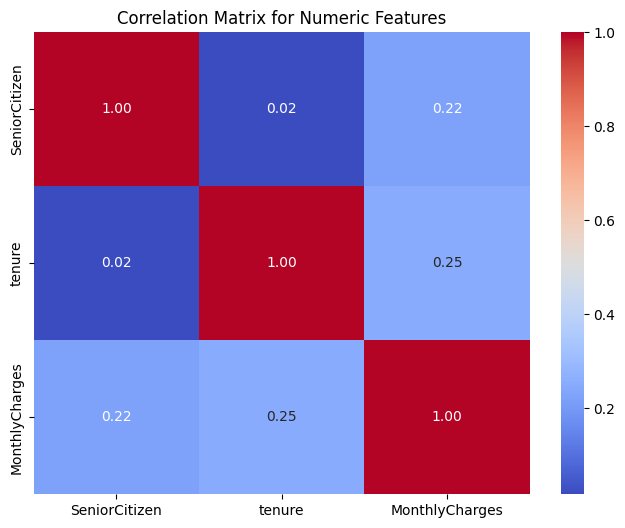

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [19]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
# 상관계수 계산 및 히트맵 시각화를 위한 코드

# 상관계수 계산
correlation_matrix = df[['SeniorCitizen', 'tenure', 'MonthlyCharges']].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

# 상관계수 행렬 반환
correlation_matrix


1. SeniorCitizen과 MonthlyCharges: 상관계수가 0.22로, 고령자인 고객들이 상대적으로 높은 월 요금을 지불하는 경향이 있음을 나타냅니다. 이 정보를 사용하여 고령자 고객을 위한 가격 전략을 재검토하거나, 가격에 민감하지 않은 고령자 고객을 대상으로 한 프리미엄 서비스를 개발할 수 있습니다.

2. tenure와 MonthlyCharges: 상관계수가 0.25로, 고객이 회사와 오래 거래할수록 월 요금이 증가하는 경향이 있습니다. 이는 장기 고객이 추가 서비스나 프리미엄 옵션을 더 많이 이용할 수 있음을 시사합니다. 이를 통해 장기 고객에게 추가 가치를 제공하는 서비스 패키지를 만들거나, 충성도 높은 고객에게 리워드를 제공하는 방안을 고려할 수 있습니다.

3. SeniorCitizen과 tenure: 이 두 변수 사이의 상관관계는 0.02로 거의 없는 것으로 나타났습니다. 이는 고령자 여부가 고객이 회사와 거래하는 기간에 큰 영향을 미치지 않음을 의미합니다. 이 데이터를 기반으로 고령자 고객을 위한 특별한 유지 전략을 수립할 필요가 없다고 결론지을 수 있습니다.

c:\Users\dbsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\dbsgh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


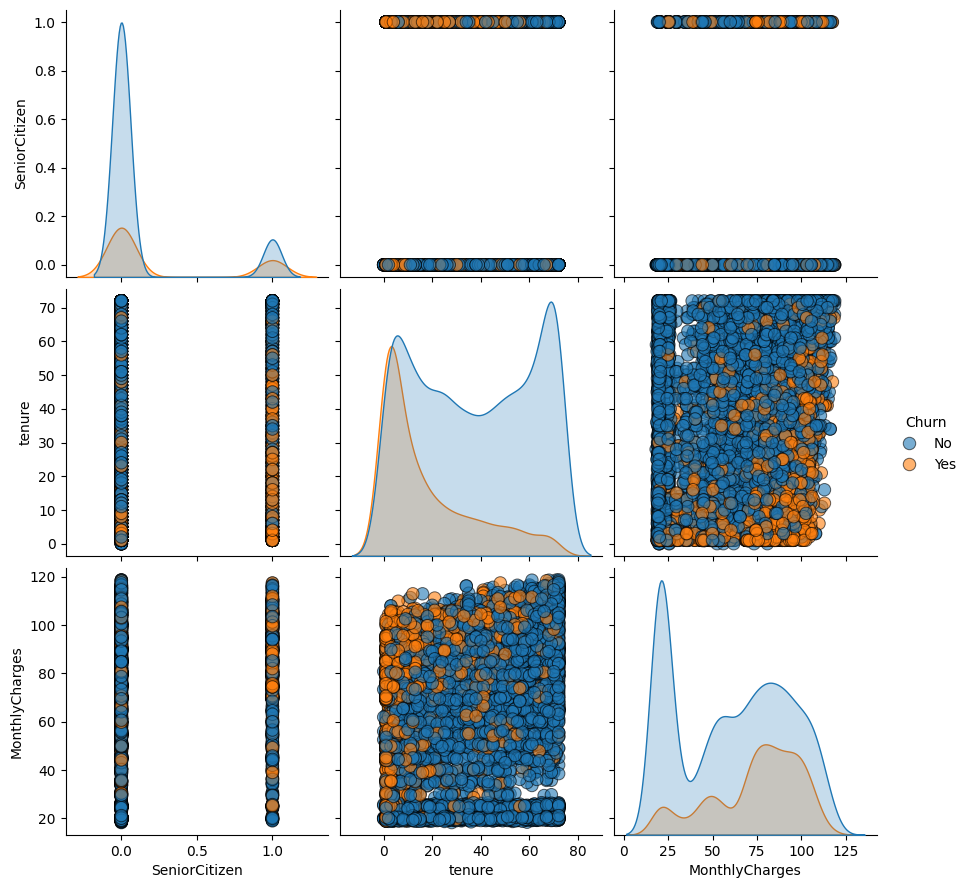

In [20]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
# 이탈 여부에 따른 수치형 변수의 pairplot 시각화

# Churn 변수를 수치형으로 변환하여 시각화를 위한 준비
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# pairplot 생성
sns.pairplot(df, vars=['SeniorCitizen', 'tenure', 'MonthlyCharges'], hue='Churn', diag_kind='kde', 
             plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=3)

plt.show()


1. SeniorCitizen: 이 그래프에서 고령자는 데이터셋 내에서 상대적으로 적은 부분을 차지합니다. 고령자와 비고령자 모두에서 이탈('Churn' == Yes)한 고객의 분포는 비슷해 보입니다. 이는 고령자 여부가 고객의 이탈에 중대한 영향을 미치지 않을 수 있음을 시사합니다.

2. tenure: tenure의 분포는 이탈 여부에 따라 다르게 나타납니다. 이탈하지 않은 고객('Churn' == No)은 일반적으로 더 긴 기간 동안 회사와 거래하고 있음을 보여줍니다. 반면에 이탈한 고객('Churn' == Yes)은 대체로 짧은 기간 동안 회사와 거래한 것을 볼 수 있습니다. 이는 고객 유지 전략에서 tenure가 중요한 변수임을 나타냅니다.

3. MonthlyCharges: 월별 요금이 높은 고객의 경우 이탈할 가능성이 더 높은 것으로 나타납니다. 이는 가격 민감도가 고객 이탈에 영향을 줄 수 있음을 시사하며, 회사가 가격 전략을 재고해야 할 필요가 있음을 나타냅니다.

4. SeniorCitizen과 MonthlyCharges: 고령자 고객은 비고령자에 비해 월별 요금이 더 높은 경향이 있으나, 이 차이는 매우 적습니다.

5. tenure와 MonthlyCharges: 이 산점도에서는 tenure가 길수록 월별 요금이 증가하는 경향을 보이는 고객이 있으나, 대체적으로 tenure와 MonthlyCharges 간에는 뚜렷한 선형 관계가 보이지 않습니다.